In [8]:
import numpy
import scipy.special
import matplotlib.pyplot
%matplotlib inline

#определение класса нейронной сеть
class neuralNetwork:
    
    #инициализация нейронной сети
    def __init__(self, inputnodes, hiddennodes, outputnodes, learning):
        #задать количество узлов во входном, скрытом и выходном слое
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        
        #коэффициент обучения
        self.lr = learning
        
        #матрицы весовых коэффициентов связей wih(между входной и скрытым слоями) и
        #who(между скрытым и выходным слоями).
        #весовые коэффициенты связей между узлом i и узлом j следующего слоя
        #обозначены как w_i_j
        #self.wih = (numpy.random.rand(self.hnodes, self.inodes) - 0.5)
        #self.who = (numpy.random.rand(self.onodes, self.hnodes) - 0.5)
        self.wih = numpy.random.normal(0.0, pow(self.hnodes, - 0.5), (self.hnodes, self.inodes))
        self.who = numpy.random.normal(0.0, pow(self.onodes, - 0.5), (self.onodes, self.hnodes))
        
        #использование сигмоиды в качестве функции активации
        self.activation_function = lambda x: scipy.special.expit(x)
        
        pass
    
    
    #тренировка нейронной сети
    def train(self, inputs_list, targets_list):
        #преобразование списка входных значений в двухмерный массив
        inputs = numpy.array(inputs_list, ndmin=2).T
        targets = numpy.array(targets_list, ndmin=2).T
        #print(targets)
        
        #рассчитать входяшие сигналы для скрытого слоя
        hidden_inputs = numpy.dot(self.wih, inputs)
        #рассчитать исходящие сигналы для скрытого слоя
        hidden_outputs = self.activation_function(hidden_inputs)
        
        #рассчитать входящие сигналы для выходного слоя
        final_inputs = numpy.dot(self.who, hidden_outputs)
        #рассчитать исходящие сигналы для выходного слоя
        final_outputs = self.activation_function(final_inputs)
        
        #ошибки выходного слоя = (целевое значение - фактическое значение)
        output_errors = targets - final_outputs
        #ошибки скрытого слоя = это ошибки output_errors,
        #распределенные пропорционально весовым коэффициентам связей
        #и рекомбинированные на скрытых узлах
        hidden_errors = numpy.dot(self.who.T, output_errors)
        
        #обновить весовые коэффициенты для связи между
        #скрытым и выходным слоями
        self.who += self.lr * numpy.dot((output_errors * final_outputs * (1.0 - final_outputs)),
                                       numpy.transpose(hidden_outputs))
        
        #обновление весовых коэффициентов для связей между входным и скрытым слоями
        self.wih += self.lr * numpy.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)),
                                        numpy.transpose(inputs))
        
        pass
    
    #опрос нейронной сети
    def query(self, inputs_list):
        #преобразуем список входных значений в двухмерный массив
        inputs = numpy.array(inputs_list, ndmin = 2).T
        
        #рассчитать входящие сигналы для скрытого слоя
        hidden_inputs = numpy.dot(self.wih, inputs)
        #рассчитать исходящие сигналы для скрытого слоя
        hidden_outputs = self.activation_function(hidden_inputs)
        
        #рассчитать входящие сигналы для выходного слоя
        final_inputs = numpy.dot(self.who, hidden_outputs)
        #рассчитать исходящие сигналы для выходного слоя
        final_outputs = self.activation_function(final_inputs)
        
        return final_outputs
    
    
    

In [9]:
#количество входных, скрытых и выходных узлов
input_nodes = 784
hidden_nodes = 100
output_nodes = 10

#коэффициент обучения равен 0,3
learning_rate = 0.3

#создаем экземпляр нейронной сети
n = neuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)


In [10]:
#загрузка в список тренировочный набор данных
training_data_file = open("dataMNIST/mnist_train.csv", 'r')
training_data_list = training_data_file.readlines()
training_data_file.close()


In [11]:
#тренировка нейронной сети
#перебрать все записи в тренировочном наборе данных
epochs = 2

for e in range(epochs):
    for record in training_data_list:
        all_values = record.split(',')
        inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
        #print(inputs)
        #print(all_values[0])
        targets = numpy.zeros(output_nodes) + 0.01
    
        targets[int(all_values[0])] = 0.99
        #print(targets)
        n.train(inputs, targets)
        pass
    pass


5


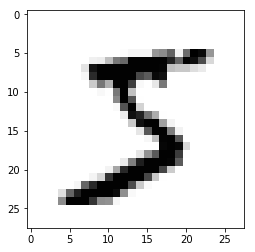

In [12]:
#загрузить в список тестовый набор данных CSV-файла набора MNIST
test_data_file = open("dataMNIST/mnist_train.csv", "r")
test_data_list = test_data_file.readlines()
test_data_file.close()

#получить первую тестовую запись
all_values = test_data_list[0].split(',')
#вывести маркер
print(all_values[0])

image_array = numpy.asfarray(all_values[1:]).reshape((28, 28))
matplotlib.pyplot.imshow(image_array, cmap='Greys', interpolation='None')


In [13]:
print(all_values[:1])
n.query((numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01)


['5']


array([[0.00449788],
       [0.00208077],
       [0.00233805],
       [0.11569007],
       [0.00178577],
       [0.92976903],
       [0.00186675],
       [0.00227212],
       [0.00220996],
       [0.00219179]])

In [14]:
#тестирование нейронной сети

#журнал ошибок работы нейронной сети, первоночально пустой
scorecard = []

#перебрать все записи в тестовом наборе
for record in test_data_list:
    all_values = record.split(',')
    #правильный ответ первой значение
    correct_label = int(all_values[0])
    #print(correct_label, "истенный маркер")
    #масштабировать и сместить выходные значения.
    inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    #опрос сети
    outputs = n.query(inputs)
    #индекс наибольшего значения является маркерным значением
    label = numpy.argmax(outputs)
    if(label == correct_label):
        #в случае правильного ответа сети 1
        scorecard.append(1)
        pass
    else:
        scorecard.append(0)
        pass
    pass



        
    

In [15]:
#рассчитать показатель эффективности в виде
#доли правильных ответов
scorecard_array = numpy.asarray(scorecard)
print(scorecard_array)
print(scorecard_array.sum())
print(scorecard_array.size)
print("эффективность = ", scorecard_array.sum() / scorecard_array.size)


[1 1 1 ... 1 1 1]
57155
60000
эффективность =  0.9525833333333333


In [16]:
import scipy.misc
img_array = scipy.misc.imread('myMnist/5.png', flatten = True)
img_data = 255.0 - img_array.reshape(784)
img_data = (img_data / 255.0 * 0.99) + 0.01
outputs = n.query(img_data)
label = numpy.argmax(outputs)
print(label)

5


/opt/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  
